In [3]:

# importing modules and packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 

In [6]:
df = pd.read_csv('./combined_final_last_10_years.csv')  
df  

,continent,country,year,demox_eiu,income_per_person,invest_%_gdp,tax_%_gdp,gini_index
0,Africa,"Congo, Dem. Rep.",2006,27.6,605,14.6,6.83,42.2
1,Africa,"Congo, Dem. Rep.",2007,25.2,623,13.7,6.99,42.1
2,Africa,"Congo, Dem. Rep.",2008,22.8,640,10.9,8.97,42.1
3,Africa,"Congo, Dem. Rep.",2009,22.1,637,14.6,7.89,42.1
4,Africa,"Congo, Dem. Rep.",2010,21.5,660,28.8,8.35,42.1
...,...,...,...,...,...,...,...,...
1229,Oceania,New Zealand,2012,92.6,33300,20.9,26.80,33.5
1230,Oceania,New Zealand,2013,92.6,33900,22.0,26.60,34.0
1231,Oceania,New Zealand,2014,92.6,34600,22.9,26.80,34.0
1232,Oceania,New Zealand,2015,92.6,35200,23.4,27.40,34.5


/Users/shreyas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shreyas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='income_per_person', ylabel='gini_index'>

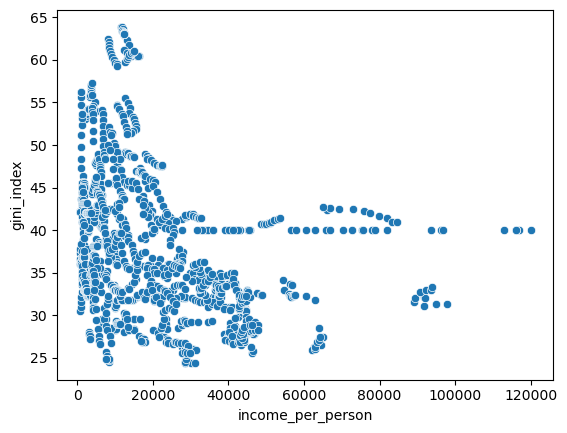

In [8]:

# plotting a scatterplot 
sns.scatterplot(x='income_per_person', 
                y='gini_index', data=df) 

In [13]:

# creating feature variables 
X = df.drop('gini_index',axis= 1) 
X = X.drop('country',axis= 1)
X = X.drop('continent',axis= 1)
y = df['gini_index'] 
print(X) 
print(y)

      year  demox_eiu  income_per_person  invest_%_gdp  tax_%_gdp
0     2006       27.6                605          14.6       6.83
1     2007       25.2                623          13.7       6.99
2     2008       22.8                640          10.9       8.97
3     2009       22.1                637          14.6       7.89
4     2010       21.5                660          28.8       8.35
...    ...        ...                ...           ...        ...
1229  2012       92.6              33300          20.9      26.80
1230  2013       92.6              33900          22.0      26.60
1231  2014       92.6              34600          22.9      26.80
1232  2015       92.6              35200          23.4      27.40
1233  2016       92.6              35700          24.4      27.20

[1234 rows x 5 columns]
0       42.2
1       42.1
2       42.1
3       42.1
4       42.1
        ... 
1229    33.5
1230    34.0
1231    34.0
1232    34.5
1233    34.8
Name: gini_index, Length: 1234, dtype: f

In [14]:

# creating train and test sets 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.3, random_state=101) 

In [15]:

# creating a regression model 
model = LinearRegression() 

In [16]:

# fitting the model 
model.fit(X_train,y_train)

LinearRegression()

In [17]:

# making predictions 
predictions = model.predict(X_test) 

In [24]:
# model evaluation 
print( 
  'mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 

# print the accuracy of the model
print('Accuracy:', model.score(X_test, y_test) * 100, "%")

mean_squared_error :  61.39583077007021
mean_absolute_error :  6.246726358507651
Accuracy: 10.785277893323563 %


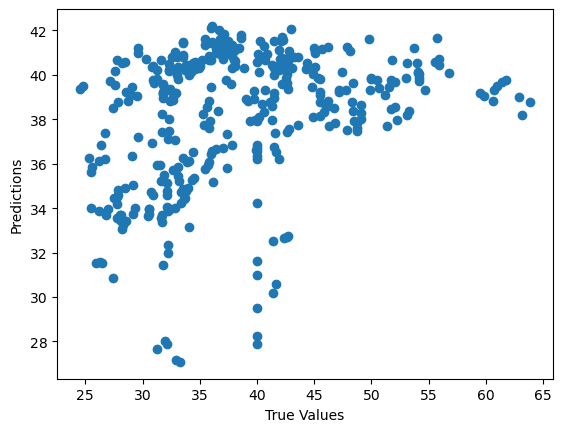

In [22]:
## Plot the model with real value
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [25]:
from scipy.stats import ttest_ind

# Perform t-test for X_train['income_per_person'] and X_test['income_per_person']
t_stat, p_value = ttest_ind(X_train['income_per_person'], X_test['income_per_person'])
print("t-test results for X_train['income_per_person'] and X_test['income_per_person']:")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.2e}")

# Perform t-test for X_train['invest_%_gdp'] and X_test['invest_%_gdp']
t_stat, p_value = ttest_ind(X_train['invest_%_gdp'], X_test['invest_%_gdp'])
print("t-test results for X_train['invest_%_gdp'] and X_test['invest_%_gdp']:")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.2e}")

# Perform t-test for other variables and print the results
# ...


t-test results for X_train['income_per_person'] and X_test['income_per_person']:
t-statistic: 0.88
p-value: 3.81e-01
t-test results for X_train['invest_%_gdp'] and X_test['invest_%_gdp']:
t-statistic: -1.17
p-value: 2.43e-01
